Source

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


def simCTI(c,A,v_func,learn_func,util_func,T=10):
    """
    Simulates CTI sharing game
    returns all T x n np array of all actions of agents
    c:  nparray of floats (agent costs)
    A:  nparray directed adjanceny matrix of underlying network
    v_func: function that accepts _ X n arrays of agent behaivor and returns float v value
    learn_func: function that accepts 2 floats (utility values) and returns 0,1 based on which action it selects
    util_func:  function that accepts costs c, matrix A ,float (result of v_func) v,nparray (action profile) a and returns a float (utility value)
    T:  Integer representing how many steps to run simulation
    """
    n=len(c)
    N=list(range(n))
    b=np.array([1/n]*n)
    aa=np.zeros((T,n))

    for t in range(T-1):
        agent=np.random.choice(N,p=b)
        v=v_func(aa[:t+1])
        a0=aa[t].copy()
        a1=aa[t].copy()
        a0[agent]=0
        a1[agent]=1

        utils=(util_func(c,A,v,a0)[agent],util_func(c,A,v,a1)[agent])
        aa[t+1]=[a0,a1][learn_func(utils)]
    return aa
#utility function
def utility(c,A,v,a):
    return ((np.diag(v)@A@np.diag(a)).T-np.diag(c))@a
#function that returns function that simulates log-linear learning for given tau value
def LLL_maker(tau):
    def LLL(utils):
        tau_frac=1/tau
        p0=np.e**(tau_frac*utils[0])/(np.e**(tau_frac*utils[0])+np.e**(tau_frac*utils[1]))
        return np.random.choice([0,1],p=[p0,1-p0])
    return LLL
#returns a function that returns random v values
def v_func_maker(underbarv,n,upper=1):
    def v_func(x):
        return np.random.rand(n)*upper+underbarv
    return v_func
#finds minimium value of CTI such that all 1 is NE
def calc_underbarv_nash(c,A,epsilon=0.0001):
    n=len(c)
    degrees=A@np.ones(n)
    # print(degrees)
    return np.max(c/degrees)+epsilon
#Finds minimium value of CTI such that all 1 maximizes the potential function
def calc_underbarv_potential(c,A,epsilon=0.0001):
    n=len(c)
    degrees=A@np.ones(n)
    # print(degrees)
    return 2*np.max(c/degrees)+epsilon
def avg_path(paths):
    M=np.array(paths)
    avgs=np.sum(M,axis=0)/len(M)
    return avgs

CTI Experiements

underbarv: 0.4001


Text(0, 0.5, 'Fraction of Agents Playing 1')

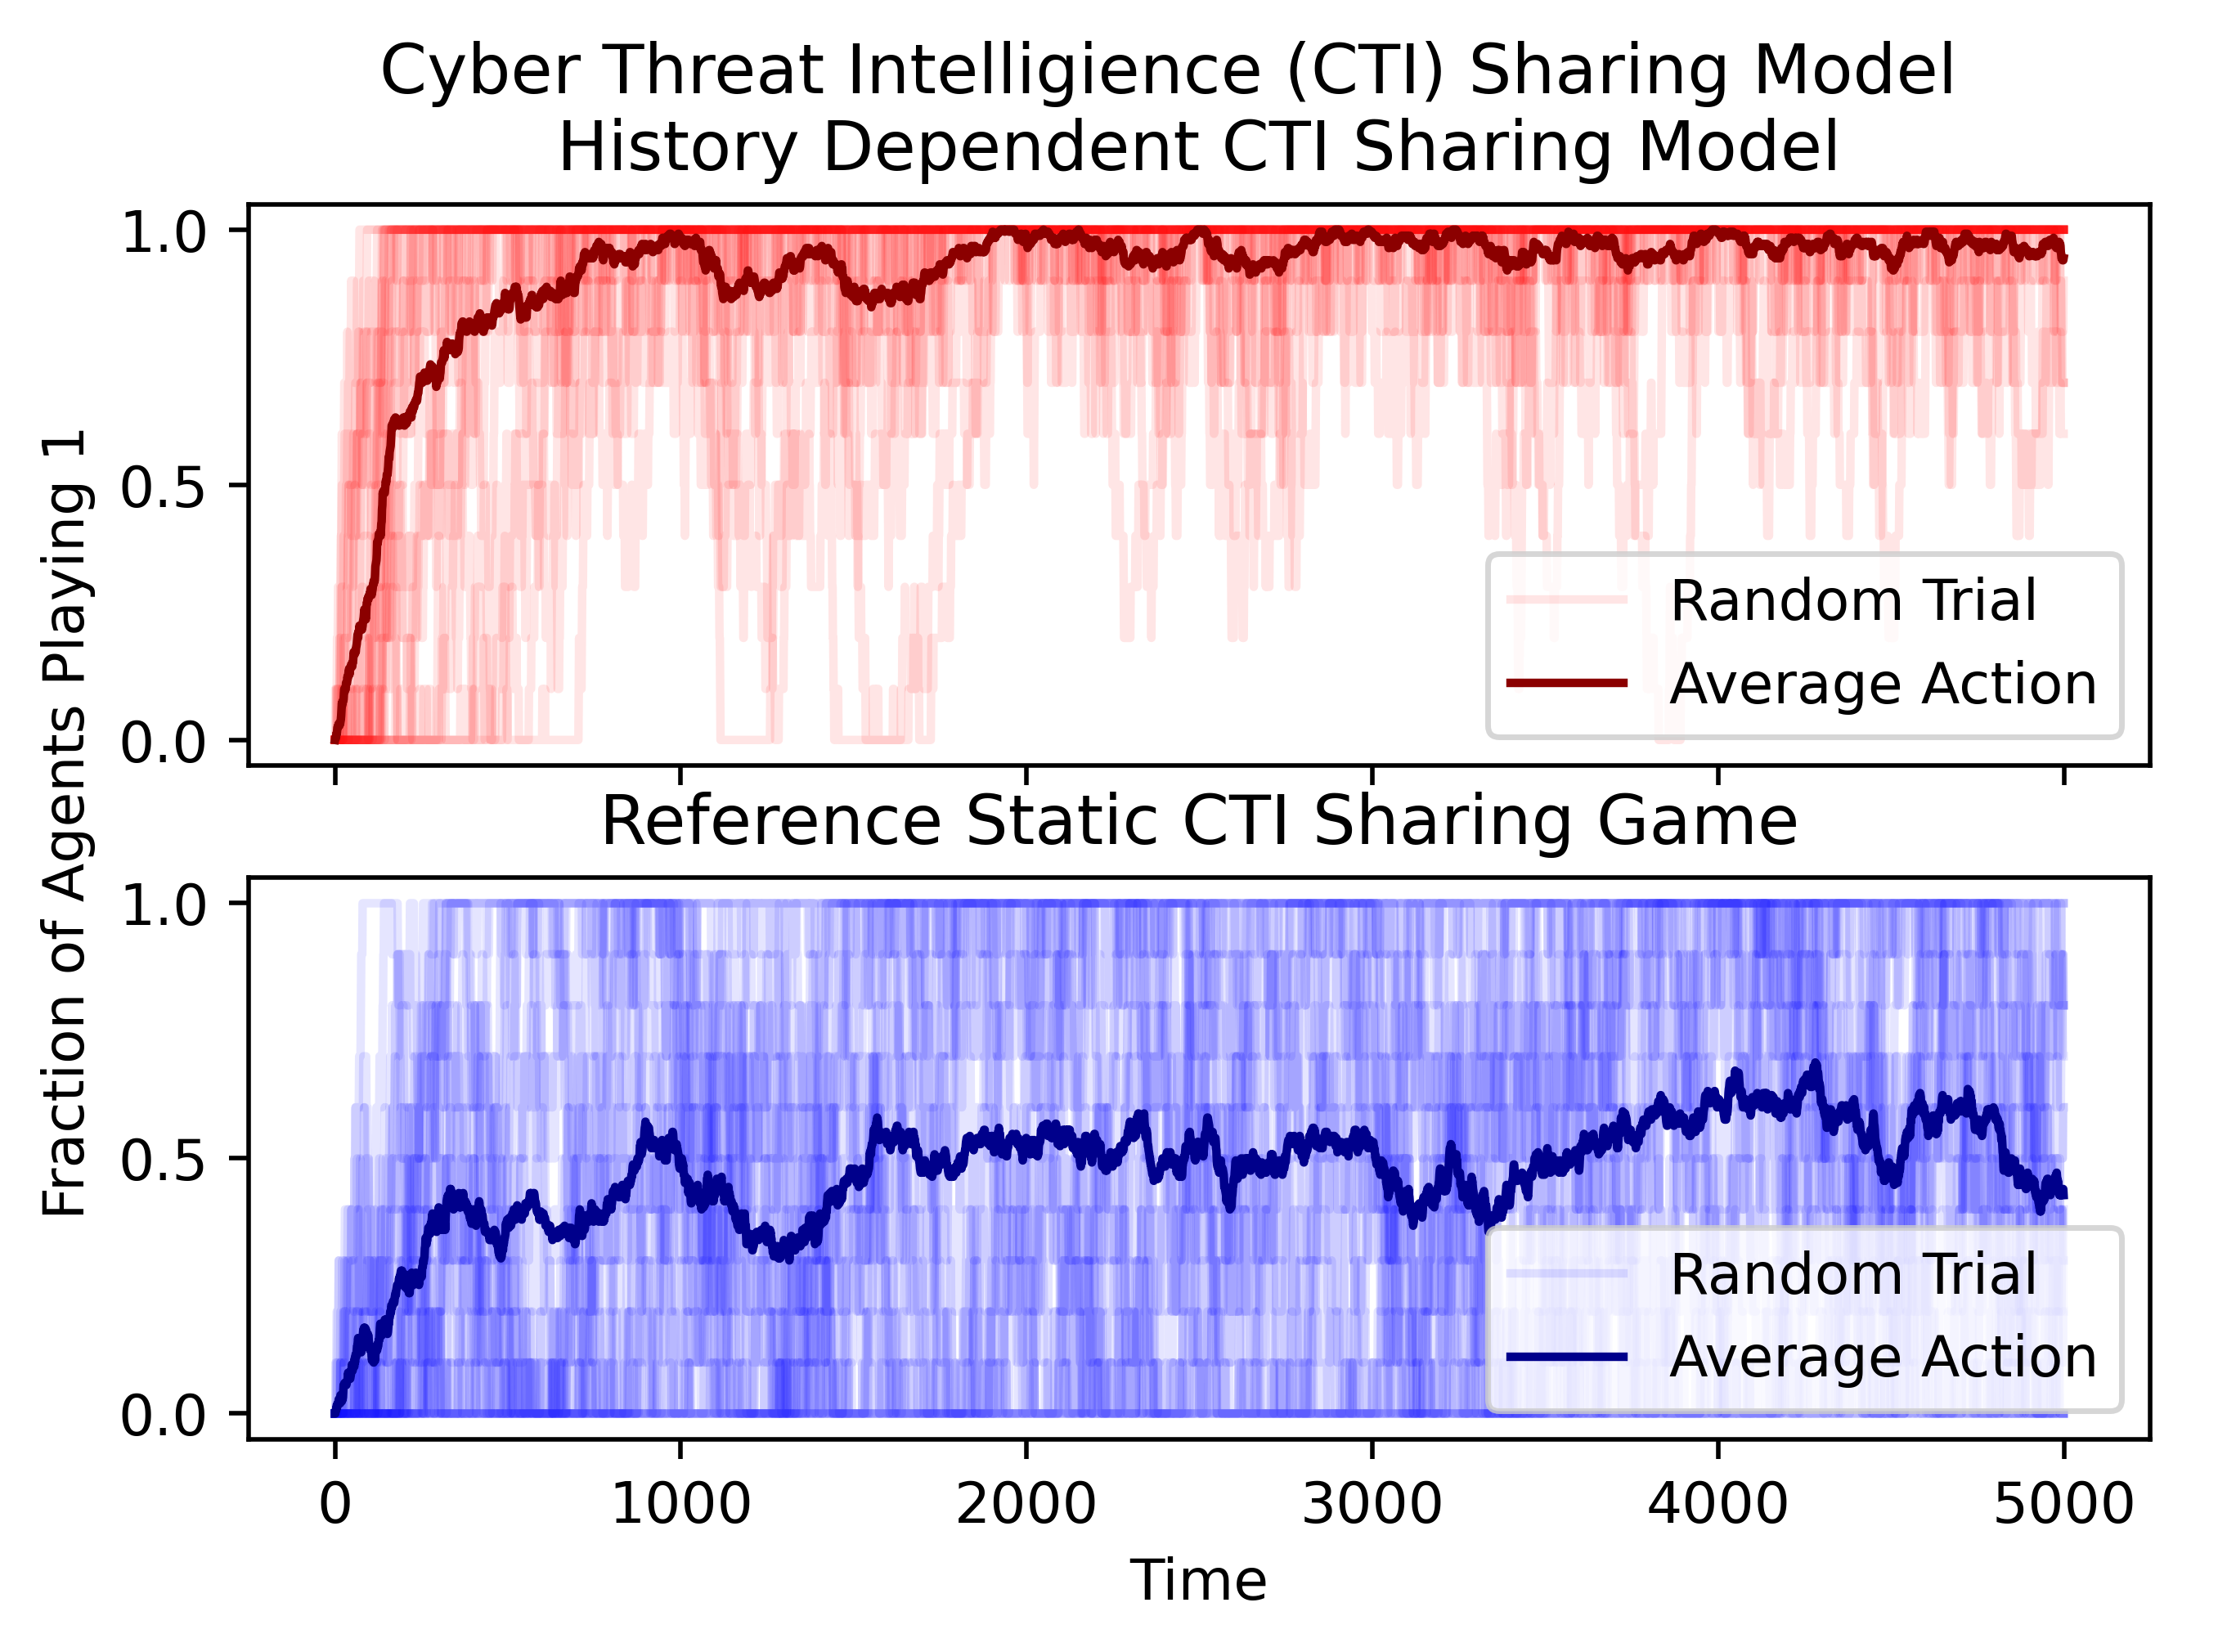

In [ ]:
n=10
T=5000
runs=25

g=nx.path_graph(n)
g.add_edge(0,n-1)
# nx.draw(g)
A=nx.to_numpy_array(g)

c=np.array([0.4]*n)
underbarv=calc_underbarv_potential(c,A)
# underbarv=0.1
print(f"underbarv: {underbarv}")
v_func_random=v_func_maker(underbarv,n,upper=0.1)
v_func=lambda x: np.array([underbarv]*n)

LLL=LLL_maker(tau=0.1)

AA_dependent=[]
AA_reference=[]

np.random.seed(0)

for i in range(runs):
    aa=simCTI(c,A,v_func_random,LLL,utility,T=T)
    sharing=np.sum(aa,axis=1)/len(aa[0])
    AA_dependent.append(sharing)

    # plt.plot(sharing,color="red",alpha=0.125)
for i in range(runs):
    aa=simCTI(c,A,v_func,LLL,utility,T=T)
    sharing=np.sum(aa,axis=1)/len(aa[0])
    AA_reference.append(sharing)
    # plt.plot(sharing,color="blue",alpha=0.125)


dependent_avg=avg_path(AA_dependent)
reference_avg=avg_path(AA_reference)
AAd=np.array(AA_dependent)
AAr=np.array(AA_reference)

# print(avg_path(AA_dependent))

# plt.figure()

fig, axs = plt.subplots(2,sharex=True,sharey=True,dpi=500)
# plt.title("SISGCG: History Dependent Versus Static")

fig.suptitle('Cyber Threat Intelligience (CTI) Sharing Model')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)


axs[0].plot(AAd.T,color="red",alpha=0.1)
axs[0].plot([],color="red",alpha=0.1,label="Random Trial")
axs[0].plot(dependent_avg,color="darkred",alpha=1,label="Average Action")
axs[0].set(title="History Dependent CTI Sharing Model")
axs[0].legend(loc="lower right")

axs[1].plot([],color="blue",alpha=0.1,label="Random Trial")
axs[1].plot(AAr.T,color="blue",alpha=0.1)
axs[1].plot(reference_avg,color="darkblue",linestyle="-",alpha=1,label="Average Action")
axs[1].legend(loc="lower right")
axs[1].set(title="Reference Static CTI Sharing Game")
# axs[0].title("sad")





fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Time")
plt.ylabel("Fraction of Agents Playing 1")

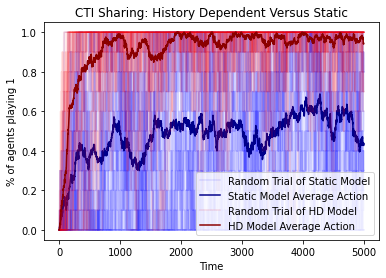

In [ ]:
plt.plot([],color="blue",alpha=0.1,label=r"Random Trial of Static Model")
plt.plot(AAr.T,color="blue",alpha=0.1)
plt.plot(reference_avg,color="darkblue",linestyle="-",alpha=1,label="Static Model Average Action")

plt.plot(AAd.T,color="red",alpha=0.1)
plt.plot([],color="red",alpha=0.1,label="Random Trial of HD Model")
plt.plot(dependent_avg,color="darkred",alpha=1,label="HD Model Average Action")
# plt.plot([],color="darkred",alpha=0.1,label="HD average")

plt.xlabel("Time")
plt.ylabel("% of agents playing 1")
plt.title("CTI Sharing: History Dependent Versus Static")
plt.legend(loc="lower right")